### **NBA Player Game Stats - 2024-2025 Season**

#### **1. Dataset Overview**
This dataset contains per-game statistics for NBA players in the 2024–2025 season. Each row corresponds to each player’s performance in a single game, including minutes played, field goals made/attempted, three-pointers, free throws, rebounds, assists, steals, blocks, turnovers, and points scored.

#### **2. Data Cleaning**

**Load the dataset** 

In [12]:
import pandas as pd

nba = pd.read_csv("NBA Player Game Stats - 20242025 Season.csv") # import the dataset into a DF
nba.info() # Check number of rows and columns if the data is complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  7221 non-null   object 
 1   Tm      7221 non-null   object 
 2   Opp     7221 non-null   object 
 3   Res     7221 non-null   object 
 4   MP      7221 non-null   float64
 5   FG      7221 non-null   int64  
 6   FGA     7221 non-null   int64  
 7   FG%     7221 non-null   float64
 8   3P      7221 non-null   int64  
 9   3PA     7221 non-null   int64  
 10  3P%     7221 non-null   float64
 11  FT      7221 non-null   int64  
 12  FTA     7221 non-null   int64  
 13  FT%     7221 non-null   float64
 14  ORB     7221 non-null   int64  
 15  DRB     7221 non-null   int64  
 16  TRB     7221 non-null   int64  
 17  AST     7221 non-null   int64  
 18  STL     7221 non-null   int64  
 19  BLK     7221 non-null   int64  
 20  TOV     7221 non-null   int64  
 21  PF      7221 non-null   int64  
 22  

**Perform initial diagnostics on the data**

In [13]:
print(nba.head().to_string()) # Check the first 5 rows of the DF if it matches the actual CSV

          Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA    3P%  FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc        Data
0   Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  0.727   1    2  0.500    0    4    4   10    1    1    1   1   37  38.1  2024-10-22
1  Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  0.333  13   15  0.867    3   13   16    4    1    3    1   1   36  34.0  2024-10-22
2  Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  0.600   2    2  1.000    0    3    3    4    1    0    0   1   24  22.4  2024-10-22
3   Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  0.667   0    0  0.000    2    2    4    4    1    0    0   2   18  19.5  2024-10-22
4  Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  0.800   2    3  0.667    0    0    0    2    0    0    1   1   22  17.8  2024-10-22


**Check for null values**

In [14]:
n = nba.isnull().sum() # Get the number of null values in the dataset
print(f'Number of null values per column: \n{n}')
n_in = nba.index[nba.isnull().any(axis=1)].tolist() # Point indices of null values if there's any
print("\nIndices with missing values:", n_in)
if n_in: # Display the null values if there's any
    print("\nLRows containing null values:")
    print(nba.loc[n_in])
else:
    print("\nNo rows with missing values found.")

Number of null values per column: 
Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

Indices with missing values: []

No rows with missing values found.


**Since there are no null values, proceed with checking the duplicate entries**

In [15]:
dup = nba.duplicated().sum() # Get the number of duplicate entries in the dataset
print(f'Number of duplicate entries: {dup}')
dup_in = nba.index[nba.duplicated()].tolist() # Point indices of duplicate rows if there's any
print('Indices with duplicate entries:',dup_in)
if dup: # Display the actual duplicate rows if there's any
    print("\nList of the duplicate entries:")
    print(nba.loc[dup_in])
else:
    print('No duplicate entries found')

Number of duplicate entries: 0
Indices with duplicate entries: []
No duplicate entries found


**Look for typographical errors in the dataset**

In [16]:
category = nba.select_dtypes(include="object").columns.tolist()
print("Sanity checks on data")
for col in category:
    vc = nba[col].value_counts(dropna=False)
    mis = vc[vc <= 2]            # values with 2 or fewer occurrences
    if not mis.empty:
        print(f"\nColumn: {col}")
        print("\nValue counts:")
        print(vc.head(10))
        print("\nPossibly misspelled values where count ≤ 2:")
        print(mis)

Sanity checks on data

Column: Player

Value counts:
Player
Anthony Black     24
Amir Coffey       24
Ron Holland       24
Malik Beasley     24
Ivica Zubac       24
Moritz Wagner     24
Isaiah Stewart    24
Franz Wagner      24
Kris Dunn         24
James Harden      24
Name: count, dtype: int64

Possibly misspelled values where count ≤ 2:
Player
Cole Swider            2
Taze Moore             2
Cam Spencer            2
Day'Ron Sharpe         2
Keshad Johnson         2
Jalen Pickett          2
Daishen Nix            2
Mark Williams          2
Justin Edwards         2
Daniss Jenkins         2
JT Thor                2
Jalen Hood-Schifino    2
Jalen Bridges          2
Trevelin Queen         2
Jaylen Martin          2
Mouhamed Gueye         2
Dominick Barlow        2
Spencer Jones          2
Reece Beekman          2
DaQuan Jeffries        1
Cam Christie           1
Trentyn Flowers        1
Riley Minix            1
Harrison Ingram        1
Justin Minaya          1
Oscar Tshiebwe         1
Da

*Upon checking, there are no typographical errors in the dataset*

**In terms of identifying and treating outliers:**   

*Identifying outliers in sports-stats datasets like this is not possible because extreme values aren't usually bad data but just a reflection of exceptional performances like a 70-point game, or record-breaking Field goal percentage for a particular number of points thus, capping of such values would mess significant insights we are after.*

#### **3. Descriptive Statistics**

**Compute for summary stats**

In [17]:
des = nba.describe().T 
med = nba.median(numeric_only=True) # compute median for column with numeric values
mod = nba.mode(numeric_only=True).iloc[0] # compute mode for column with numeric values (take 1st mode if there are many)
std = nba.std(numeric_only=True) # compute standard deviation for column with numeric values

summary = pd.DataFrame({ # Construct new DF to combine the summary metrics
    "mean":   des["mean"],
    "median": med,
    "mode":   mod,
    "std":    std,
    "min":    des["min"], # display minimum value
    "max":    des["max"]  # display maximum value
})
print("\nSummary Statistics")
print(summary)


Summary Statistics
           mean  median  mode        std  min    max
MP    22.193191  23.300  12.0  10.950661  0.0  47.78
FG     3.778978   3.000   0.0   3.225574  0.0  22.00
FGA    8.147486   7.000   6.0   6.026257  0.0  38.00
FG%    0.425915   0.444   0.0   0.258730  0.0   1.00
3P     1.236117   1.000   0.0   1.529055  0.0  10.00
3PA    3.445091   3.000   0.0   3.162310  0.0  20.00
3P%    0.264501   0.222   0.0   0.290227  0.0   1.00
FT     1.588007   1.000   0.0   2.242171  0.0  17.00
FTA    2.045008   1.000   0.0   2.721525  0.0  26.00
FT%    0.420428   0.400   0.0   0.435381  0.0   1.00
ORB    1.002770   1.000   0.0   1.348126  0.0  12.00
DRB    3.033513   2.000   1.0   2.686168  0.0  17.00
TRB    4.036283   3.000   2.0   3.411373  0.0  22.00
AST    2.394959   2.000   0.0   2.607192  0.0  22.00
STL    0.767345   0.000   0.0   0.989217  0.0   7.00
BLK    0.475557   0.000   0.0   0.834417  0.0   9.00
TOV    1.291095   1.000   0.0   1.444836  0.0  10.00
PF     1.784794   2.000   

**Check for each numeric variable's distribution shape**

In [18]:
sh = pd.DataFrame({ 
    "skewness": nba.skew(numeric_only=True), # Compute skewness to measure asymmetry of the distribution
    "kurtosis": nba.kurtosis(numeric_only=True) # Compute kurtosis to measure tail heaviness 
})
print("\nDistribution Shape (Skewness and Kurtosis)")
print(sh)


Distribution Shape (Skewness and Kurtosis)
      skewness  kurtosis
MP   -0.255553 -0.931931
FG    0.990982  0.823102
FGA   0.836409  0.428527
FG%   0.084554 -0.237597
3P    1.505921  2.425906
3PA   1.050103  0.993061
3P%   0.872321 -0.048908
FT    1.991054  4.979065
FTA   1.923200  5.071438
FT%   0.246508 -1.707355
ORB   1.941346  5.196680
DRB   1.194743  1.529904
TRB   1.194740  1.597371
AST   1.708705  3.887483
STL   1.485633  2.471400
BLK   2.353126  7.953831
TOV   1.411328  2.255912
PF    0.606098 -0.303839
PTS   1.006759  0.845773
GmSc  0.931243  0.773690


This table quantifies each numeric variable’s asymmetry (skewness) and tailedness (kurtosis) that tells which stats are highly prone to extreme outliers versus those that stay more tightly clustered

In terms of skewness:
- Positive skew like 3P at +1.51 or FT at +1.99 shows a long right tail or few very high values as most games have low three-point or free-throw totals, but a few outliers rack up very high counts.

- Negative skew like MP at –0.26 indicates slight left-tail weight as there are some games with unusually few minutes, but most cluster above the mean.

In terms of kurtosis:
- Positive kurtosis like BLK at +7.95 or ORB at +5.20 means heavy tails and a sharp peak wherein very rare extreme block or offensive-rebound performances drive these high values.

- Negative kurtosis like MP at –0.93 or FT% at –1.71 indicates lighter tails and flatter peaks which means there are fewer extreme outliers than a normal distribution.

**Calculate the frequency of every column with categorical values** 

In [19]:
cate_col = nba.select_dtypes(include=["object"]).columns.tolist() # Identify all categorical features

for col in cate_col:
    counts = nba[col].value_counts() # Count occurences for each category
    perc   = (counts / len(nba) * 100).round(2) # Compute each category’s % of total rows
    freq_df = pd.DataFrame({"count": counts, "percent": perc})
    
    print(f"\nFrequency Table per: {col}")
    print(freq_df.head(10).to_string())


Frequency Table per: Player
                count  percent
Player                        
Anthony Black      24     0.33
Amir Coffey        24     0.33
Ron Holland        24     0.33
Malik Beasley      24     0.33
Ivica Zubac        24     0.33
Moritz Wagner      24     0.33
Isaiah Stewart     24     0.33
Franz Wagner       24     0.33
Kris Dunn          24     0.33
James Harden       24     0.33

Frequency Table per: Tm
     count  percent
Tm                 
ORL    284     3.93
CHI    273     3.78
MEM    262     3.63
LAC    261     3.61
DAL    260     3.60
OKC    257     3.56
HOU    254     3.52
GSW    253     3.50
DET    251     3.48
SAS    250     3.46

Frequency Table per: Opp
     count  percent
Opp                
MEM    270     3.74
ORL    270     3.74
LAC    263     3.64
DET    263     3.64
CHI    259     3.59
HOU    253     3.50
NOP    253     3.50
CLE    251     3.48
POR    248     3.43
NYK    247     3.42

Frequency Table per: Res
     count  percent
Res                
L 

#### **4. Data Visualization**

##### ***Univariate Analysis:***
- **Histogram**

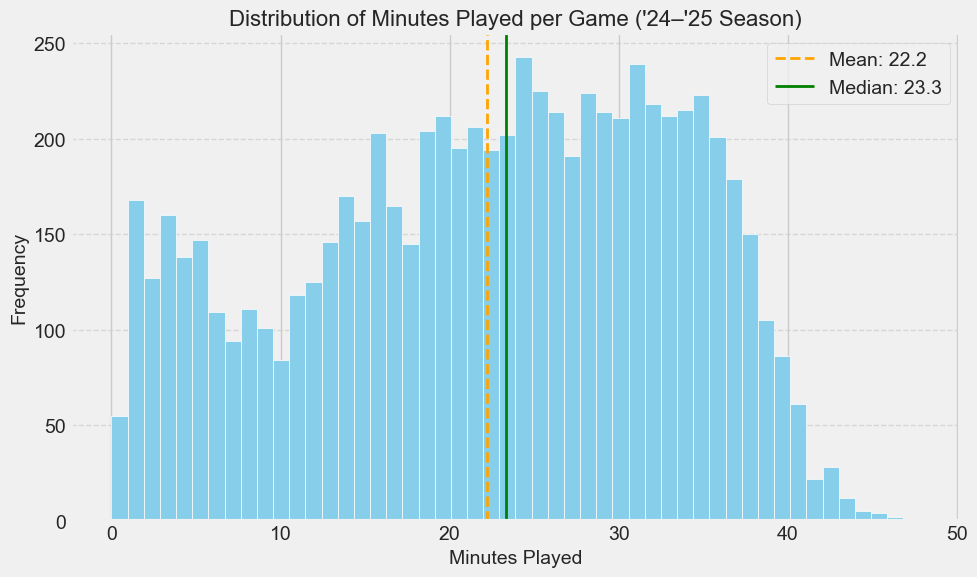

In [37]:
import matplotlib.pyplot as plt # import library for plotting
plt.style.use('fivethirtyeight')

data = nba['MP'] # use MP data

fig, ax = plt.subplots(figsize=(10, 6))

counts, bins, patches = ax.hist(
    data,
    bins=50,
    color='skyblue',
    edgecolor='white'
)

ax.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data.mean() # compute and draw mean & median
median_val = data.median()
ax.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')

ax.set_title("Distribution of Minutes Played per Game ('24–'25 Season)", fontsize=16)
ax.set_xlabel('Minutes Played', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.legend()

plt.tight_layout()
plt.show()


- **Boxplot**

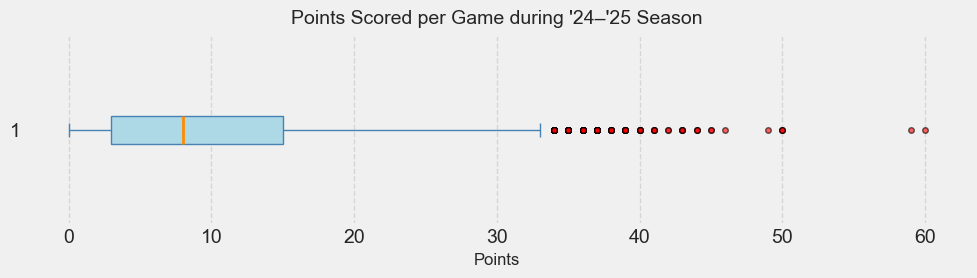

In [43]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10, 3))

bp = ax.boxplot(
    nba['PTS'],  # points per game data
    vert=False,            
    patch_artist=True,  # to fill shape     
    boxprops=dict(facecolor='lightblue', edgecolor='steelblue'),
    medianprops=dict(color='darkorange', linewidth=2),
    whiskerprops=dict(color='steelblue'),
    capprops=dict(color='steelblue'),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6)
)

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)  # no horizontal grid

ax.set_title("Points Scored per Game during '24–'25 Season", fontsize=14, pad=8)
ax.set_xlabel("Points", fontsize=12)

plt.tight_layout()

plt.show()

##### ***Bivariate Analysis:***

- **Scatter plot**

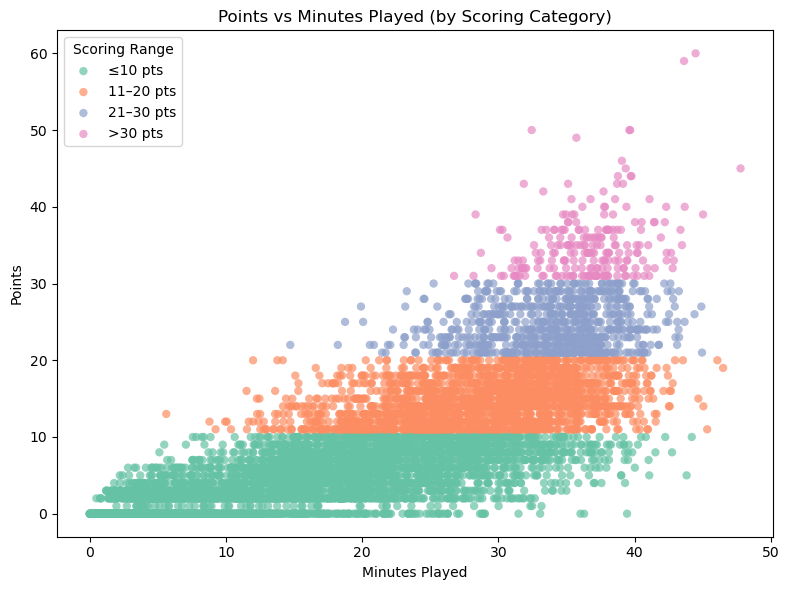

In [ ]:
bins   = [ -1, 10, 20, 30, nba['PTS'].max() ] # range for scoring games
labels = ['≤10 pts', '11–20 pts', '21–30 pts', f'>30 pts']

nba['PTS_cat'] = pd.cut(nba['PTS'], bins=bins, labels=labels) #categorize each game into the range

colors = {
    '≤10 pts':  '#66c2a5',
    '11–20 pts': '#fc8d62',
    '21–30 pts': '#8da0cb',
    '>30 pts':  '#e78ac3',
}

plt.figure(figsize=(8,6)) # to plot each group separately
for cat, color in colors.items():
    subset = nba[nba['PTS_cat'] == cat]
    plt.scatter(
        subset['MP'],
        subset['PTS'],
        label=cat,       
        color=color,
        alpha=0.7,
        edgecolors='none'
    )

plt.title('Points vs Minutes Played (by Scoring Category)')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.legend(title='Scoring Range')
plt.tight_layout()
plt.show()


- **Heatmap**

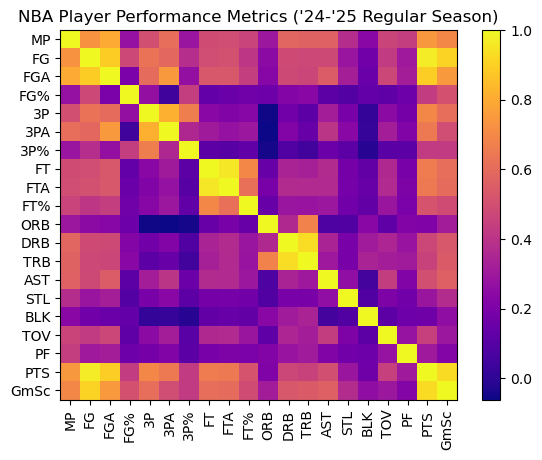

In [23]:
num_col = nba.select_dtypes(include='number').columns # select numeric columns from DF
corr = nba[num_col].corr() # compute correlation matrix 
plt.figure()
plt.imshow(corr, aspect='auto', cmap = 'plasma') # render correlation matrix as img
plt.xticks(range(len(num_col)), num_col, rotation='vertical')
plt.yticks(range(len(num_col)), num_col)
plt.title("NBA Player Performance Metrics ('24-'25 Regular Season)")
plt.colorbar()
plt.show()

#### **5. Insights and Hypothesis Formulation**

**Observations**
1. Minutes Played (MP) strongly correlates with PTS made because in the scatter plot above, there is an upward trend which means that players who log more minutes most of the time rack up more points.

2. Defensive rebounds (DRB) and total rebounds (TRB) have a very high correlation (≈ 0.95), while offensive rebounds (ORB) are only weakly correlated with defensive boards, which indicates that most of a player’s rebound total is driven by defensive boards, with true “offensive rebound specialists” being relatively rare.

3. Based on the boxplot, the upper whisker extends only to around 30 points, but there are instances portrayed by the circles that there are points that go beyond 30 even up past 50–60 points. Zero-point games also exist as there are instances as well where the lower whisker touches 0 which implies that there are records of players who logged minutes but didn't score.

**Hypothesis**
1. As a player’s field-goal attempts (FGA) increase, their shooting efficiency (FG%) declines.  
*The heatmap shows a negative correlation between FGA and FG% (≈ –0.30). In other words, higher shot volume often comes with tougher looks or fatigue, so it can be expected for FG% to drop when a player takes far more shots than usual.*